In [20]:
!pip install pandas numpy scikit-learn matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


In [21]:
# Importing libraries for data analysis and clustering.
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load datasets into Pandas DataFrames.
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [23]:
# Aggregate transaction data to create customer-level features.
customer_transactions = transactions.groupby("CustomerID").agg({
    "TotalValue": ["sum", "mean"],
    "Quantity": "sum",
    "ProductID": lambda x: x.nunique()  # Number of unique products purchased.
}).reset_index()
customer_transactions.columns = ["CustomerID", "TotalSpend", "AvgSpend", "TotalQuantity", "UniqueProducts"]


In [24]:
# Merge customer profile and transaction data.
data = pd.merge(customers, customer_transactions, on="CustomerID", how="left")


In [25]:
# Fill missing values with 0.
data.fillna(0, inplace=True)


In [26]:
# Select numerical features for clustering.
features = ["TotalSpend", "AvgSpend", "TotalQuantity", "UniqueProducts"]


In [27]:
# Standardize numerical features.
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])


In [28]:
# Define the range for the number of clusters.
k_range = range(2, 11)
db_scores = []
kmeans_models = {}

In [29]:
# Perform KMeans clustering for different values of k.
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data[features])
    db_index = davies_bouldin_score(data[features], cluster_labels)
    db_scores.append(db_index)
    kmeans_models[k] = (kmeans, cluster_labels)


In [30]:
# Select the best model based on the lowest DB Index.
optimal_k = k_range[np.argmin(db_scores)]
best_kmeans, best_labels = kmeans_models[optimal_k]
data["Cluster"] = best_labels

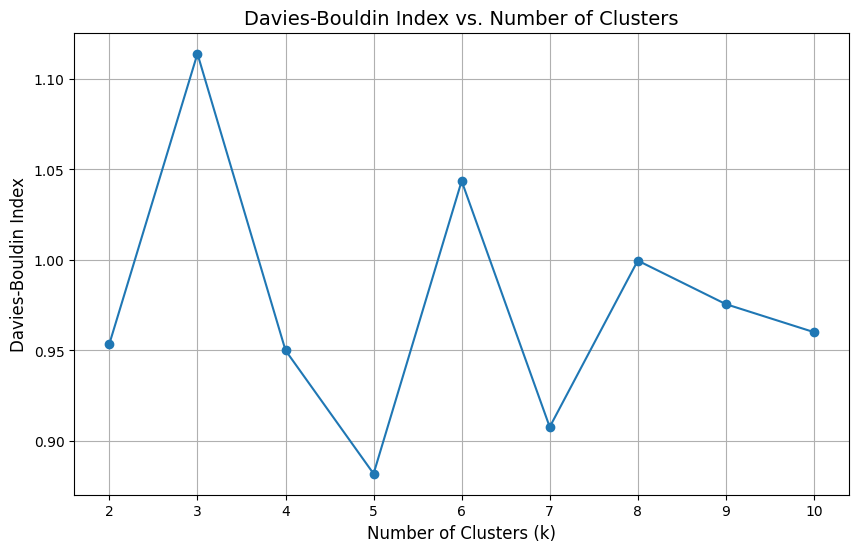

In [31]:
# Visualize DB Index values to determine the optimal number of clusters.
plt.figure(figsize=(10, 6))
plt.plot(k_range, db_scores, marker="o")
plt.title("Davies-Bouldin Index vs. Number of Clusters", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Davies-Bouldin Index", fontsize=12)
plt.grid()
plt.show()

In [32]:
# Assuming k_range and db_scores are already defined
for k, db_score in zip(k_range, db_scores):
    print(f"Number of Clusters: {k}, Davies-Bouldin Index: {db_score}")


Number of Clusters: 2, Davies-Bouldin Index: 0.9536265251176204
Number of Clusters: 3, Davies-Bouldin Index: 1.1139354163787687
Number of Clusters: 4, Davies-Bouldin Index: 0.9500248278240228
Number of Clusters: 5, Davies-Bouldin Index: 0.8818695129096479
Number of Clusters: 6, Davies-Bouldin Index: 1.043600624599456
Number of Clusters: 7, Davies-Bouldin Index: 0.9076899192259326
Number of Clusters: 8, Davies-Bouldin Index: 0.9996216538340357
Number of Clusters: 9, Davies-Bouldin Index: 0.9755702350456426
Number of Clusters: 10, Davies-Bouldin Index: 0.9601025036947751


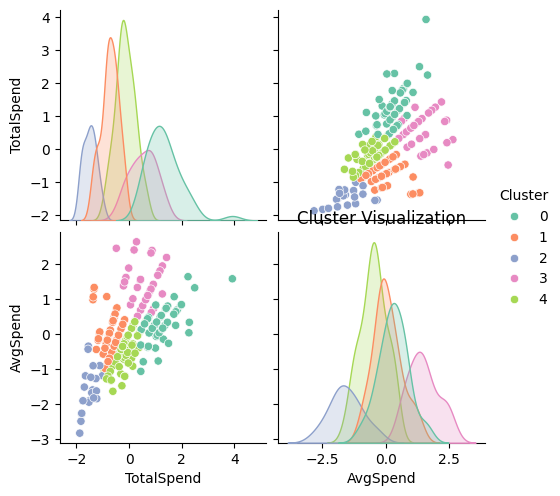

In [33]:
# Visualize clusters using a pairplot (for top 2 features by variance).
sns.pairplot(data, vars=features[:2], hue="Cluster", palette="Set2")
plt.title("Cluster Visualization")
plt.savefig("pairplot.png")
plt.show()

In [34]:
# Assuming 'data' is your DataFrame with clusters assigned to a 'Cluster' column
# and 'features' is a list of feature names you're using for clustering

# Cluster statistics
for cluster_num in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster_num]
    print(f"\nCluster {cluster_num} Summary:")
    print(f"Number of samples: {len(cluster_data)}")
    
    # Print descriptive statistics for the features
    cluster_stats = cluster_data[features[:2]].describe()
    print("Feature Descriptive Statistics:")
    print(cluster_stats)
    
    # Optionally, print the centroid of each cluster for specific features
    cluster_centroid = cluster_data[features[:2]].mean()
    print(f"Cluster {cluster_num} Centroid:")
    print(cluster_centroid)

# Print overall insights about the dataset
print("\nOverall Dataset Summary:")
print(data[features[:2]].describe())



Cluster 0 Summary:
Number of samples: 44
Feature Descriptive Statistics:
       TotalSpend   AvgSpend
count   44.000000  44.000000
mean     1.326067   0.294537
std      0.667263   0.583830
min      0.442626  -1.063399
25%      0.851481  -0.035938
50%      1.242211   0.278473
75%      1.704192   0.701390
max      3.926416   1.645706
Cluster 0 Centroid:
TotalSpend    1.326067
AvgSpend      0.294537
dtype: float64

Cluster 1 Summary:
Number of samples: 47
Feature Descriptive Statistics:
       TotalSpend   AvgSpend
count   47.000000  47.000000
mean    -0.736145   0.058417
std      0.326340   0.555622
min     -1.373814  -0.983508
25%     -0.886725  -0.248894
50%     -0.748752  -0.025086
75%     -0.496572   0.390408
max     -0.170885   1.338150
Cluster 1 Centroid:
TotalSpend   -0.736145
AvgSpend      0.058417
dtype: float64

Cluster 2 Summary:
Number of samples: 21
Feature Descriptive Statistics:
       TotalSpend   AvgSpend
count   21.000000  21.000000
mean    -1.495144  -1.578277
std    

In [35]:
# Print the optimal number of clusters and DB Index.
print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Davies-Bouldin Index for Optimal Clusters: {min(db_scores):.4f}")

Optimal Number of Clusters: 5
Davies-Bouldin Index for Optimal Clusters: 0.8819


In [36]:
# Save the results into a CSV file.
data[["CustomerID", "Cluster"]].to_csv("Customer_Clusters.csv", index=False)
print("Customer Clusters saved to Customer_Clusters.csv")


Customer Clusters saved to Customer_Clusters.csv
